In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Note**: Before starting this practical, you might want to spend
some time looking at the INLA examples we have discussed during Lecture 3. If
you already did it, then go directly to question 1.
The code below loads INLA.

**University of Edinburgh**

**School of Mathematics**

**Bayesian Data Analysis, 2020/2021, Semester 2**

**Daniel Paulin & Nicolò Margaritella**

**Workshop 3: Introduction to INLA**

In [2]:
#This code unzips an installation of R-INLA from an online source, and loads INLA
#IMPORTANT: Go to the Kaggle Settings (right hand side) and enable the Internet option before running this.

system("wget --no-check-certificate -r 'https://uoe-my.sharepoint.com/:u:/g/personal/dpaulin_ed_ac_uk/EUNBvDg_EJVFqSZJA3Xz7LsB5cVgqYk0HWWnOp74_Dr28A?download=1' -O /kaggle/working/kaggle_INLA.zip")
system("unzip /kaggle/working/kaggle_INLA.zip")
system("rm /kaggle/working/kaggle_INLA.zip")
library(INLA,lib.loc="/kaggle/working")

#If INLA has been successfully loaded, you should see the following:
#This is INLA_20.03.17 built 2021-01-02 20:27:47 UTC.
#See www.r-inla.org/contact-us for how to get help.
#To enable PARDISO sparse library; see inla.pardiso()

#The following code does the full installation. You can try it if the previous code fails, but this takes longer.
#install.packages("INLA",repos=c(getOption("repos"),INLA="https://inla.r-inla-download.org/R/stable"), dep=TRUE,lib="/kaggle/working")
#library(INLA,lib.loc="/kaggle/working")


Loading required package: Matrix

Loading required package: sp

Loading required package: parallel

Loading required package: foreach

This is INLA_20.03.17 built 2021-01-02 20:27:47 UTC.
See www.r-inla.org/contact-us for how to get help.
To enable PARDISO sparse library; see inla.pardiso()



# 1.  Simple linear regression with robustification

# Winning Olympic Men's Long Jump Distances (adapted from Witmer, 2017) 
 
**The data are the winning men's long jump distances (m) from 1900
through 2008. You will fit a linear regression of the distances as a
function of Olympic year: 
$$\begin{aligned}
Jump & = & \beta_0 + \beta_1 \mbox{Year} + \epsilon\end{aligned}$$
three different ways: standard frequentist approach, a Bayesian
approach assuming normal errors (using INLA), and a Bayesian approach assuming a
$t$ distribution for errors (using INLA).**

**Run the following commands in `R` to begin (this will install and load the package Stat2Data and load the Long Jump dataset).**

In [3]:
install.packages("Stat2Data", lib="/kaggle/working")
library(Stat2Data,lib.loc="/kaggle/working")
data("LongJumpOlympics")   #Makes the dataset available in this R session
Jump <- LongJumpOlympics$Gold
Year <- LongJumpOlympics$Year
#You can get more info about the dataset by the command
#help(topic="LongJumpOlympics",package="Stat2Data")

**(i) Fit a simple linear regression on Jump against Year using the lm function, and make a plot of the data with the fitted line overlaid using the abline function.**


Call:
lm(formula = Jump ~ Year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40256 -0.10991 -0.03256  0.12408  0.70239 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.483595   2.689700  -7.244 1.75e-07 ***
Year          0.014066   0.001376  10.223 3.19e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2375 on 24 degrees of freedom
Multiple R-squared:  0.8132,	Adjusted R-squared:  0.8055 
F-statistic: 104.5 on 1 and 24 DF,  p-value: 3.192e-10


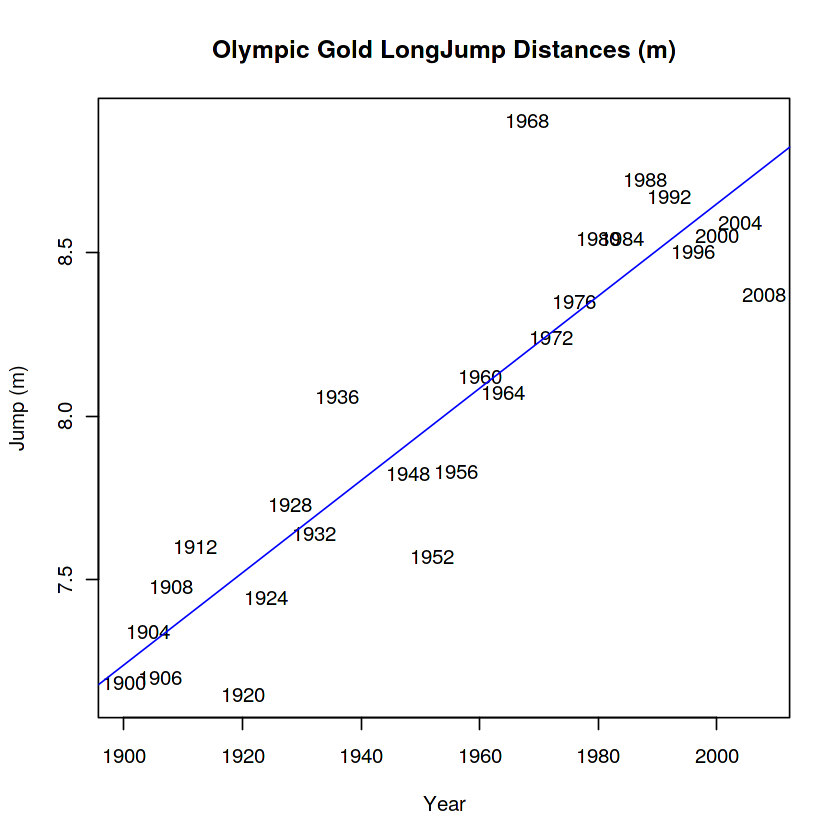

In [4]:
#1.1. Fit simple linear regression model.
m1 <- lm(Jump ~ Year)
summary(m1)
#Plot data with fit overlaid.
par(mfrow=c(1,1))
plot(Jump ~ Year,xlab="Year",ylab="Jump (m)",
     type="n",main="Olympic Gold LongJump Distances (m)",cex=0.6)
text(x=Year,y=Jump,labels=Year)
abline(m1,col="blue")

**(ii)  Center the data, and carry out a Bayesian linear regression analysis using `INLA`.
As in the frequentist case assume $\epsilon$ $\sim$ Normal(0,
$\sigma^2$). Use the following priors for the three parameters:
$$\begin{aligned}
\beta_0, \beta_1 & \sim & \mbox{Normal} \left ( \mu_0=0, \tau_0=0.001 \right ) \\
\tau & \sim & \mbox{Gamma} \left ( a=0.1, b=0.1 \right )
\end{aligned}$$**


In [5]:
meanY <- mean(Year)
Year.ctr=Year-meanY

prec.prior <- list(prec=list(prior = "loggamma", param = c(0.1, 0.1)))

prior.beta <- list(mean.intercept = 0, prec.intercept = 0.001,
                    mean = 0, prec = 0.001)

data=data.frame(Jump,Year.ctr)

m1I <- inla(Jump ~Year.ctr,data=data,control.family=list(hyper=prec.prior),control.fixed=prior.beta)

**(iii) Compute the summary statistics and plot the densities for the model parameters $\beta_0$, $\beta_1$ and $\sigma$.**

The summary statistics and densities are shown below.

In [6]:
summary(m1I)



Call:
   c("inla(formula = Jump ~ Year.ctr, data = data, control.family = 
   list(hyper = prec.prior), ", " control.fixed = prior.beta)") 
Time used:
    Pre = 0.518, Running = 0.109, Post = 0.0391, Total = 0.666 
Fixed effects:
             mean    sd 0.025quant 0.5quant 0.975quant  mode kld
(Intercept) 8.008 0.052      7.906    8.008      8.110 8.008   0
Year.ctr    0.014 0.002      0.011    0.014      0.017 0.014   0

Model hyperparameters:
                                         mean   sd 0.025quant 0.5quant
Precision for the Gaussian observations 15.58 4.47       8.08    15.15
                                        0.975quant  mode
Precision for the Gaussian observations      25.50 14.29

Expected number of effective parameters(stdev): 2.00(0.001)
Number of equivalent replicates : 12.98 

Marginal log-Likelihood:  -19.30 

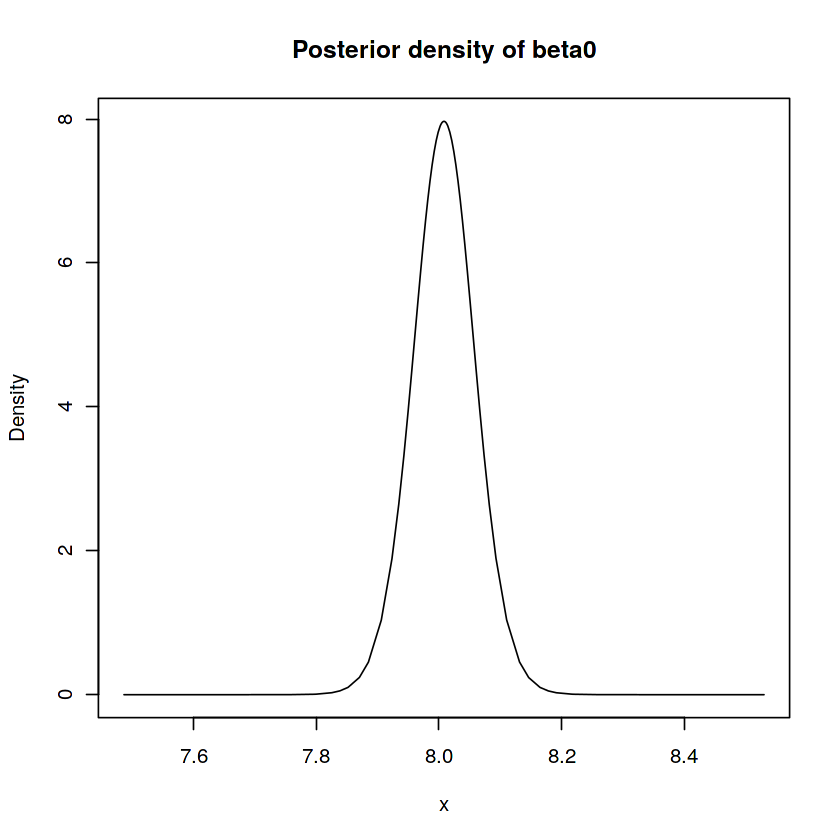

In [7]:
plot(m1I$marginals.fixed$`(Intercept)`, type ="l",xlab="x",ylab="Density",
main='Posterior density of beta0')

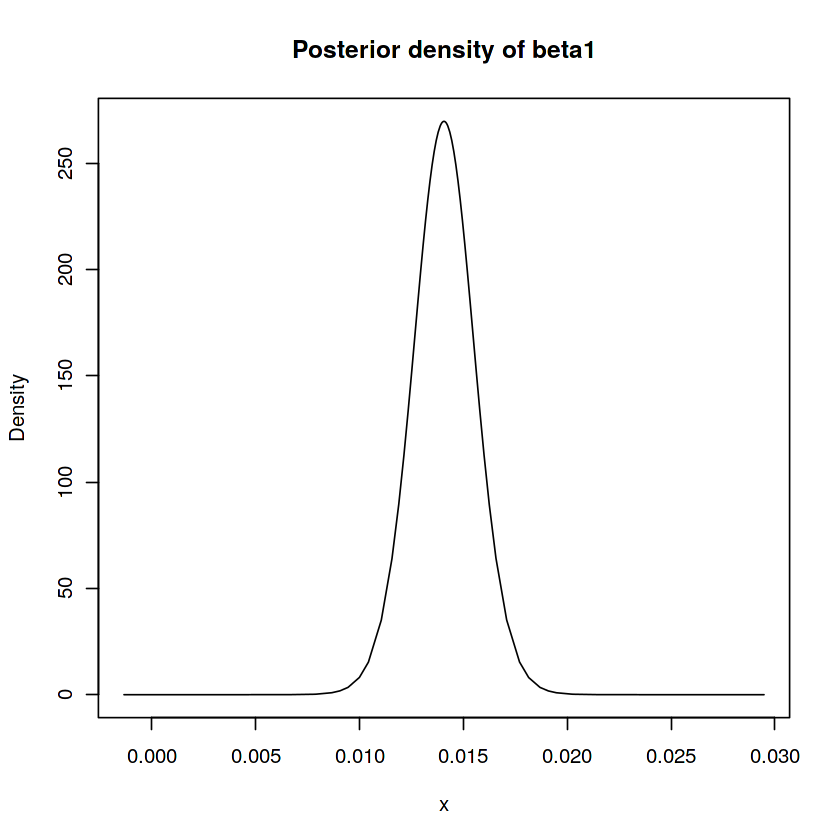

In [8]:
plot(m1I$marginals.fixed$Year.ctr, type ="l",xlab="x",ylab="Density",
main='Posterior density of beta1')

In [9]:
#By writing
#names(m1I$marginals.hyperpar)
#we can find out that the precision parameter can be accessed as 
#m1I$marginals.hyperpar[[1]] 
#m1I$marginals.hyperpar$`Precision for the Gaussian observations` would work too

marg.sigma <- inla.tmarginal(function(tau) tau^(-1/2),
  m1I$marginals.hyperpar[[1]])
#Summary statistics of sigma
cat("Summary statistics of sigma\n")
inla.zmarginal(marg.sigma)

Summary statistics of sigma
Mean            0.26148 
Stdev           0.0390927 
Quantile  0.025 0.198085 
Quantile  0.25  0.233578 
Quantile  0.5   0.256822 
Quantile  0.75  0.284195 
Quantile  0.975 0.351241 


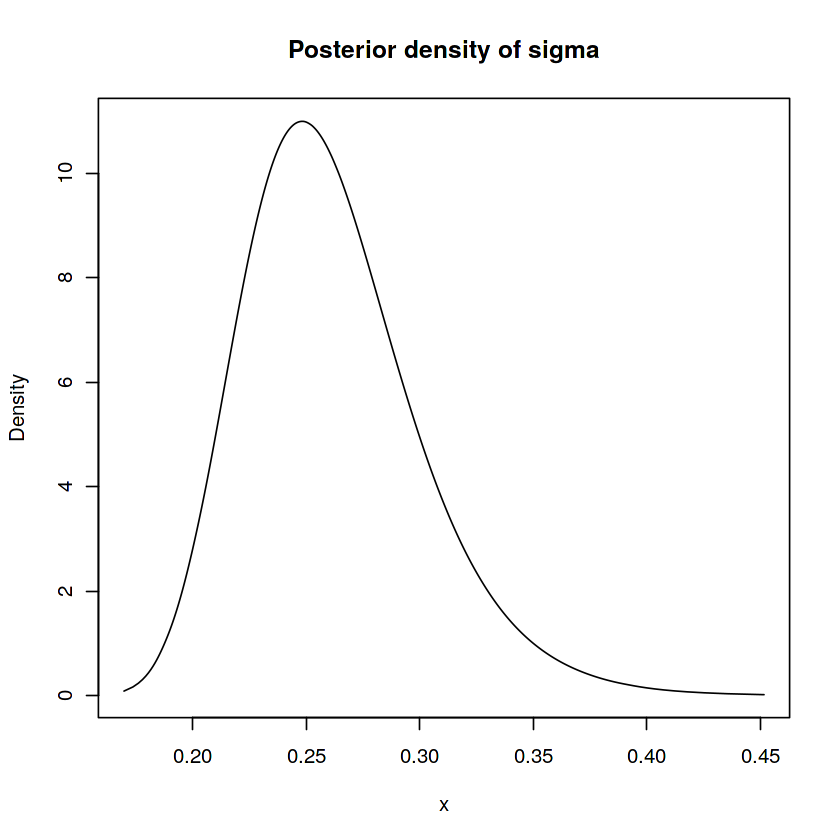

In [10]:
#Plot of marginal of sigma
plot(marg.sigma, type ="l",xlab="x",ylab="Density",
main='Posterior density of sigma')

**(iv) Using a Bayesian Linear Model fitted with INLA with the same priors as in (ii), plot the posterior predictive density of the long jump distance in 2021 (hopefully the Summer Olympics will happen this year). Compute the expectation and state 95% Bayesian credible intervals for the long jump distance in 2021.**

**Hint: you can ensure that INLA computes the posterior predictive distribution at time 2021 by including 2021 in your Year variable, while setting the corresponding component in the Jump variable as NA.**

First, we include a new row in the dataframe for year 2021, with the response variable set to NA.
After this, we fit the model in INLA.

In [11]:
meanY <- mean(Year)
Year.ctr=Year-meanY
Year.ctr.2021=c(Year.ctr,2021-meanY)
Jump.2021=c(Jump,NA)
#We are using the same priors as in (ii)
data.2021=data.frame(Jump=Jump.2021,Year.ctr=Year.ctr.2021)

m2I <- inla(Jump ~ Year.ctr,data=data.2021,control.family=list(hyper=prec.prior),
            control.fixed=prior.beta,control.predictor = list(compute = TRUE), control.compute = list(config = TRUE))

summary(m2I)


Call:
   c("inla(formula = Jump ~ Year.ctr, data = data.2021, control.compute = 
   list(config = TRUE), ", " control.predictor = list(compute = TRUE), 
   control.family = list(hyper = prec.prior), ", " control.fixed = 
   prior.beta)") 
Time used:
    Pre = 0.303, Running = 0.0783, Post = 0.0545, Total = 0.436 
Fixed effects:
             mean    sd 0.025quant 0.5quant 0.975quant  mode kld
(Intercept) 8.008 0.052      7.906    8.008      8.110 8.008   0
Year.ctr    0.014 0.002      0.011    0.014      0.017 0.014   0

Model hyperparameters:
                                         mean   sd 0.025quant 0.5quant
Precision for the Gaussian observations 15.58 4.47       8.08    15.15
                                        0.975quant  mode
Precision for the Gaussian observations      25.50 14.29

Expected number of effective parameters(stdev): 2.00(0.001)
Number of equivalent replicates : 12.98 

Marginal log-Likelihood:  -19.30 
Posterior marginals for the linear predictor and
 the fit

Now we will plot the posterior predictive. For this, we need to obtain samples from the linear predictor using inla.posterior.sample,
and add the Gaussian noise from the likelihood, as we have done during Lecture 3.

Warning message in inla.posterior.sample.eval(function(...) {:
“Function 'inla.posterior.sample.eval()' is experimental.”


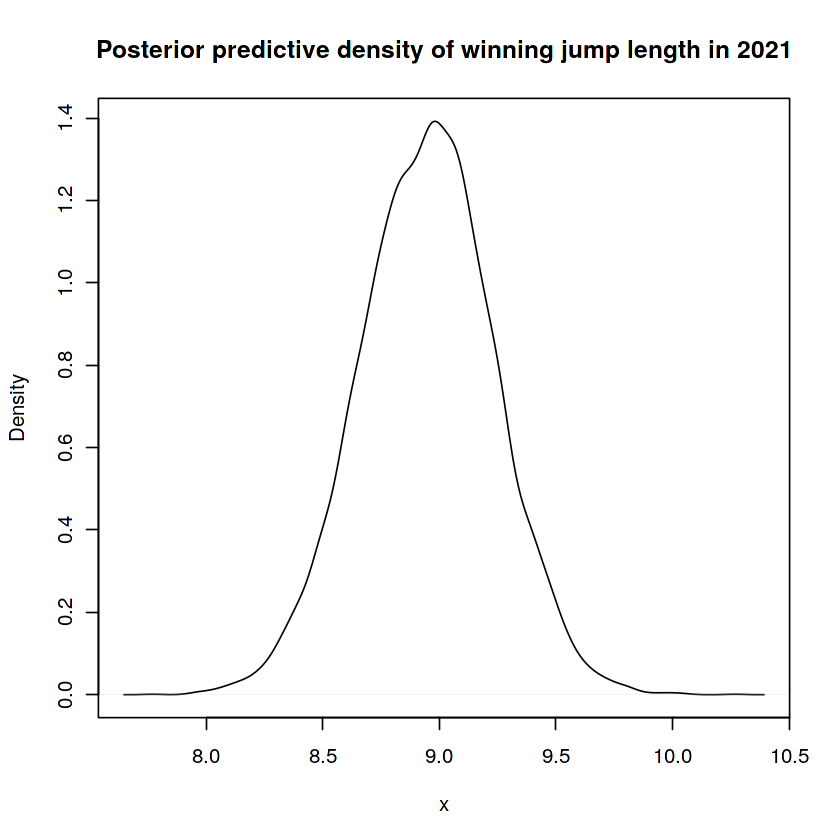

In [12]:
n=length(Year.ctr)

nbsamp=10000;
m2I.samp=inla.posterior.sample(n=nbsamp, result=m2I,selection= list(Predictor=27))

#Obtain the samples from the linear predictors, which is equivalent to the mean of the observations as the link function is the identity here
predictor.samples=inla.posterior.sample.eval(function(...) {Predictor},
m2I.samp)

#We obtain the samples from the parameter sigma using the samples from the precision 
sigma.samples=1/sqrt(inla.posterior.sample.eval(function(...) {theta},
m2I.samp))

#We obtain the posterior predictive samples by adding the Gaussian noise from the likelihood to the mean (mu_i=eta_i)


post.pred.samples=predictor.samples+rnorm(nbsamp, mean=0,sd=sigma.samples)

plot(density(post.pred.samples),type ="l",xlab="x",ylab="Density",
main='Posterior predictive density of winning jump length in 2021')

**(v) Using INLA, compute the posterior predictive probability that the winning jump in 1968 will be exceeded during the Olympics by 2028, assuming that Olympics will be held in 2021, 2024 and 2028.
Hint: you can compute this by sampling from the posterior predictive.**

The first step is to include 3 new rows for years (2021, 2024 and 2028) in the dataframe, with Jump variable set at NA.
Once this is done, we can fit the model with INLA.

In [13]:
meanY <- mean(Year)
Year.ctr=Year-meanY
Year.ctr.2028=c(Year.ctr,2021-meanY,2024-meanY,2028-meanY)
Jump.2028=c(Jump,NA,NA,NA)
#We are using the same priors as in (ii)

m3I <- inla(Jump.2028 ~ Year.ctr.2028,data=data.frame(Jump=Jump.2028,Year=Year.ctr.2028),
            control.family=list(hyper=prec.prior),control.fixed=prior.beta,control.predictor = list(compute = TRUE),
            control.compute = list(config = TRUE))

summary(m3I)


Call:
   c("inla(formula = Jump.2028 ~ Year.ctr.2028, data = data.frame(Jump = 
   Jump.2028, ", " Year = Year.ctr.2028), control.compute = list(config = 
   TRUE), ", " control.predictor = list(compute = TRUE), control.family = 
   list(hyper = prec.prior), ", " control.fixed = prior.beta)") 
Time used:
    Pre = 0.296, Running = 0.0781, Post = 0.05, Total = 0.424 
Fixed effects:
               mean    sd 0.025quant 0.5quant 0.975quant  mode kld
(Intercept)   8.008 0.052      7.906    8.008      8.110 8.008   0
Year.ctr.2028 0.014 0.002      0.011    0.014      0.017 0.014   0

Model hyperparameters:
                                         mean   sd 0.025quant 0.5quant
Precision for the Gaussian observations 15.58 4.47       8.08    15.15
                                        0.975quant  mode
Precision for the Gaussian observations      25.50 14.29

Expected number of effective parameters(stdev): 2.00(0.001)
Number of equivalent replicates : 12.98 

Marginal log-Likelihood:  -19.3

In [14]:
#We obtain samples from the linear predictors, and only use the ones that correspond to the 3 additional years 2021, 2024 and 2028
nbsamp=10000
m3I.samp <- inla.posterior.sample(nbsamp, m3I,selection = list(Predictor=27:29))


#Obtain the samples from the linear predictors, which is equivalent to the mean of the observations as the link function is the identity here
predictor.samples=inla.posterior.sample.eval(function(...) {Predictor},
m3I.samp)

#We obtain the samples from the parameter sigma using the samples from the precision 
sigma.samples=1/sqrt(inla.posterior.sample.eval(function(...) {theta},
m3I.samp))

#We obtain the posterior predictive samples by adding the Gaussian noise from the likelihood to the mean (mu_i=eta_i)

post.pred.samples=matrix(0,nrow=3,ncol=nbsamp)
for(it in 1:3){
post.pred.samples[it,]=predictor.samples[it,]+rnorm(nbsamp, mean=0,sd=sigma.samples)
}

#We compute tha max of each column by sapply, this will be the max among the 3 years for each sample
max.post.pred.samples=sapply(data.frame(post.pred.samples),max)

#We print out the result
p.1968.exceeded=mean(max.post.pred.samples>Jump.2028[16])
cat("Posterior probability of exceeding the record of 1968:",p.1968.exceeded)


Posterior probability of exceeding the record of 1968: 0.9198

**(vi) *Robustifying the regression.* As was noted in Lecture 2, the
effects of extreme observations or "outliers" on regressing
results can be diminished by using a $t$ distribution for the
observations. For simplicity, first assume a $t$ distribution with 3
degrees of freedom for the distribution of errors. Revise the INLA model code from (ii)-(iii)
accordingly (continuing to work with the centred covariates) and
re-run.**

Firstly, we fit the robust regression model with 3 degrees of freedom in the $t$ distribution.

In [16]:
meanY <- mean(Year)
Year.ctr=Year-meanY
#Setting the priors for Student's t distribution
prior.t <- list(prec=list(prior = "loggamma", param = c(0.1, 0.1)), dof = list(initial=log(3-2), fixed=TRUE) ) 
prior.beta <- list(mean.intercept = 0, prec.intercept = 0.001,
                    mean = 0, prec = 0.001)

m4I <- inla(Jump ~ Year.ctr,family="T",data=data.frame(Jump,Year.ctr),control.family=list(hyper=prior.t),control.fixed=prior.beta)
summary(m4I)


Call:
   c("inla(formula = Jump ~ Year.ctr, family = \"T\", data = 
   data.frame(Jump, ", " Year.ctr), control.family = list(hyper = 
   prior.t), control.fixed = prior.beta)" ) 
Time used:
    Pre = 0.284, Running = 0.15, Post = 0.0272, Total = 0.461 
Fixed effects:
             mean    sd 0.025quant 0.5quant 0.975quant  mode kld
(Intercept) 7.998 0.042      7.915    7.998      8.082 7.998   0
Year.ctr    0.014 0.001      0.012    0.014      0.016 0.014   0

Model hyperparameters:
                                          mean   sd 0.025quant 0.5quant
precision for the student-t observations 10.96 4.18       4.72    10.31
                                         0.975quant mode
precision for the student-t observations      20.90 9.09

Expected number of effective parameters(stdev): 2.00(0.001)
Number of equivalent replicates : 12.98 

Marginal log-Likelihood:  -17.82 

Now we plot the posterior marginals for the parameters $\beta_0$, $\beta_1$, and $\sigma$.

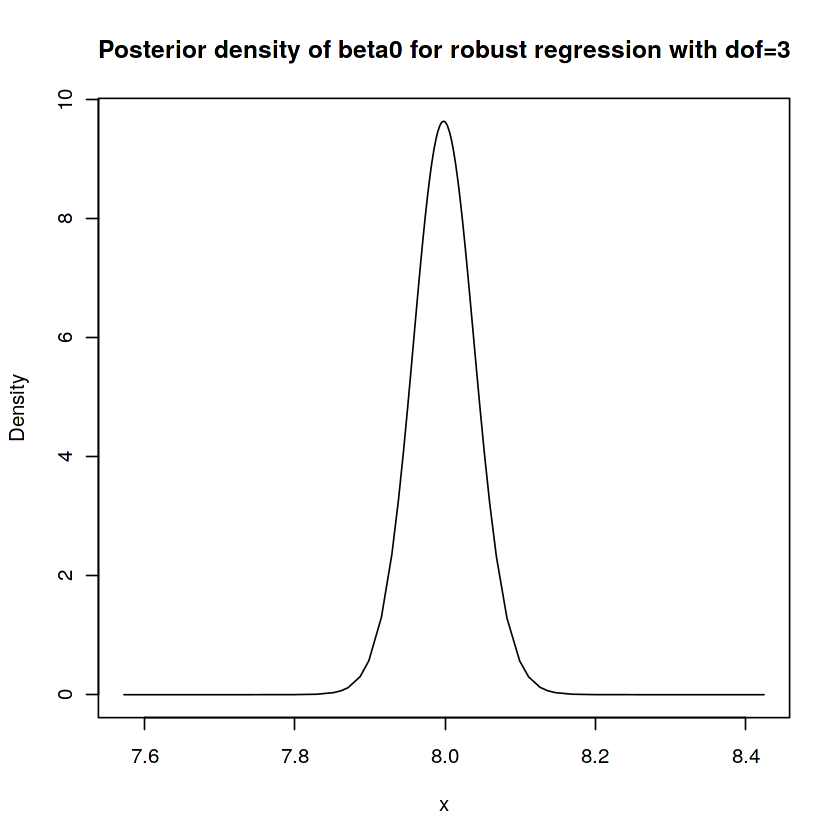

In [17]:
plot(m4I$marginals.fixed$`(Intercept)`, type ="l",xlab="x",ylab="Density",
main='Posterior density of beta0 for robust regression with dof=3')

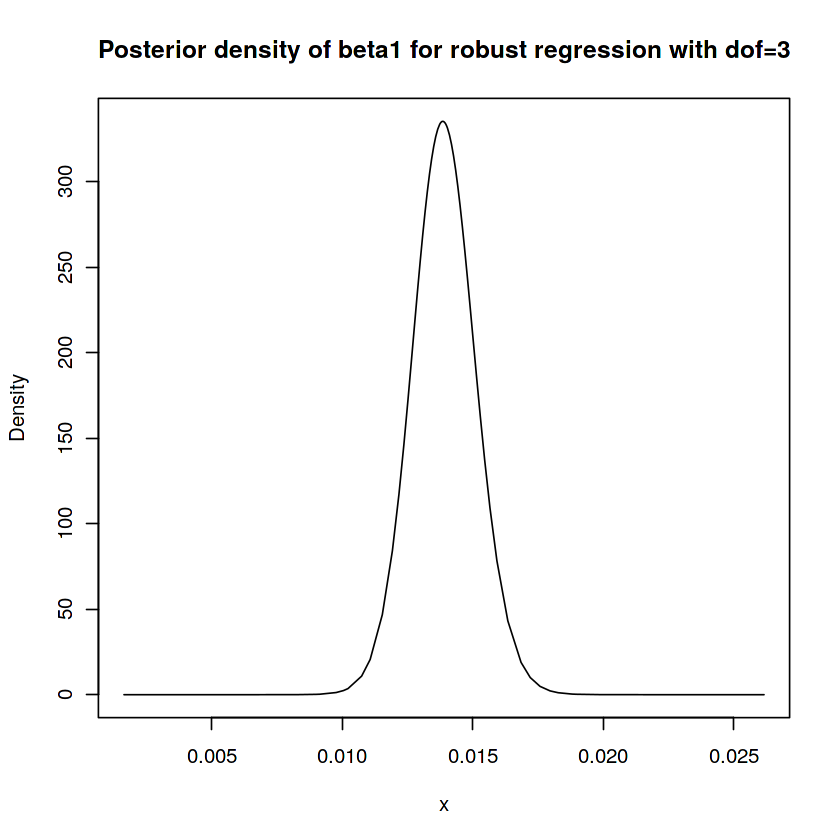

In [18]:
plot(m4I$marginals.fixed$Year.ctr, type ="l",xlab="x",ylab="Density",
main='Posterior density of beta1 for robust regression with dof=3')

In [19]:
names(m4I$marginals.hyperpar)

[1] "precision for the student-t observations"

In [20]:
#we can find out the name of the precision parameter from the summary above, or by running
marg.robust.sigma <- inla.tmarginal(function(tau) tau^(-1/2),
  m4I$marginals.hyperpar$`precision for the student-t observations`)
#Summary statistics of sigma
cat("Summary statistics of sigma for robust regression with dof=3\n")
inla.zmarginal(marg.robust.sigma)

Summary statistics of sigma for robust regression with dof=3
Mean            0.318643 
Stdev           0.0615061 
Quantile  0.025 0.218965 
Quantile  0.25  0.27468 
Quantile  0.5   0.311336 
Quantile  0.75  0.354453 
Quantile  0.975 0.459688 


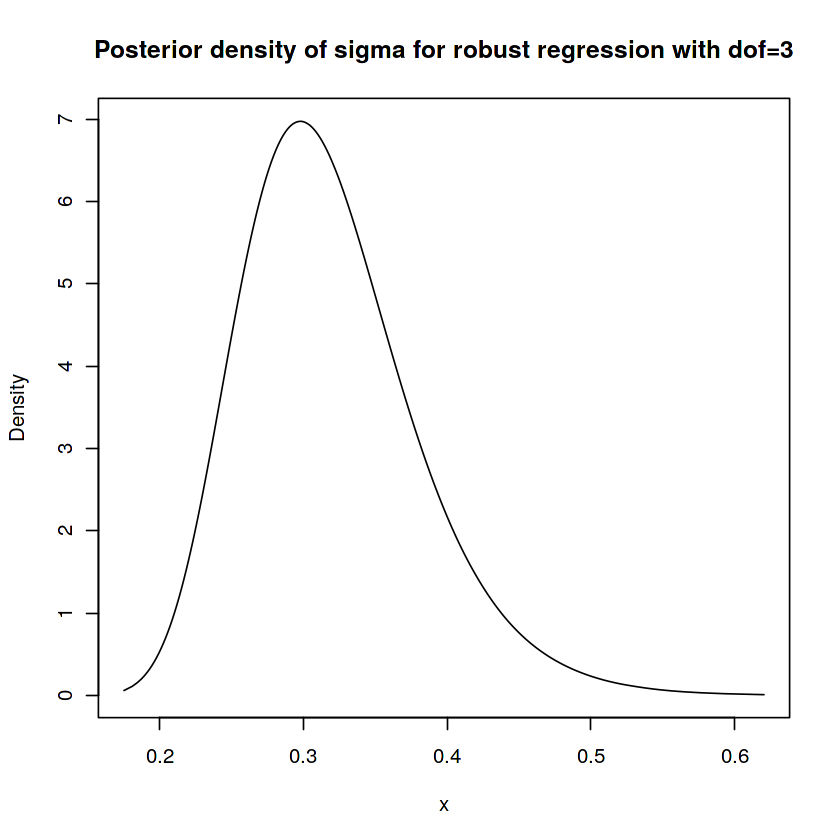

In [21]:
#Plot of marginal of sigma
plot(marg.robust.sigma, type ="l",xlab="x",ylab="Density",
main='Posterior density of sigma for robust regression with dof=3')

**(vii) In the robust regression INLA example in the previous question (vi), set a Gamma(1,1) prior on the degrees of freedom parameter $\nu$, instead of fixing it at 3. Plot the posterior distribution of $\nu$.**

The implementation is similar to (vi), but we need to set the prior.t parameter differently to allow for a Gamma prior instead of fixing $\nu$.

In [22]:
meanY <- mean(Year)
Year.ctr=Year-meanY
#Setting the priors for Student's t distribution
#The reason that we are writing "loggamma" instead of "gamma" is that
#INLA has a logarithmic internal parametrisation for most of the hyperparameters,
#including precision and degrees of freedom

prior.t <- list(prec=list(prior = "loggamma", param = c(0.1, 0.1)), dof = list(prior = "loggamma",param = c(1,1)) ) 
prior.beta <- list(mean.intercept = 0, prec.intercept = 0.001,
                    mean = 0, prec = 0.001)

m5I <- inla(Jump ~ Year.ctr,family="T",data=data.frame(Jump,Year.ctr),control.family=list(hyper=prior.t),control.fixed=prior.beta)
summary(m5I)


Call:
   c("inla(formula = Jump ~ Year.ctr, family = \"T\", data = 
   data.frame(Jump, ", " Year.ctr), control.family = list(hyper = 
   prior.t), control.fixed = prior.beta)" ) 
Time used:
    Pre = 0.28, Running = 0.509, Post = 0.0334, Total = 0.822 
Fixed effects:
             mean    sd 0.025quant 0.5quant 0.975quant  mode kld
(Intercept) 7.998 0.041      7.917    7.998      8.081 7.997   0
Year.ctr    0.014 0.001      0.012    0.014      0.016 0.014   0

Model hyperparameters:
                                         mean    sd 0.025quant 0.5quant
precision for the student-t observations 8.71 4.952       2.06     7.79
degrees of freedom for student-t         2.70 0.624       2.07     2.52
                                         0.975quant mode
precision for the student-t observations      20.80 5.49
degrees of freedom for student-t               4.34 2.19

Expected number of effective parameters(stdev): 2.00(0.001)
Number of equivalent replicates : 12.98 

Marginal log-Likeliho

[1] "precision for the student-t observations"
[2] "degrees of freedom for student-t"

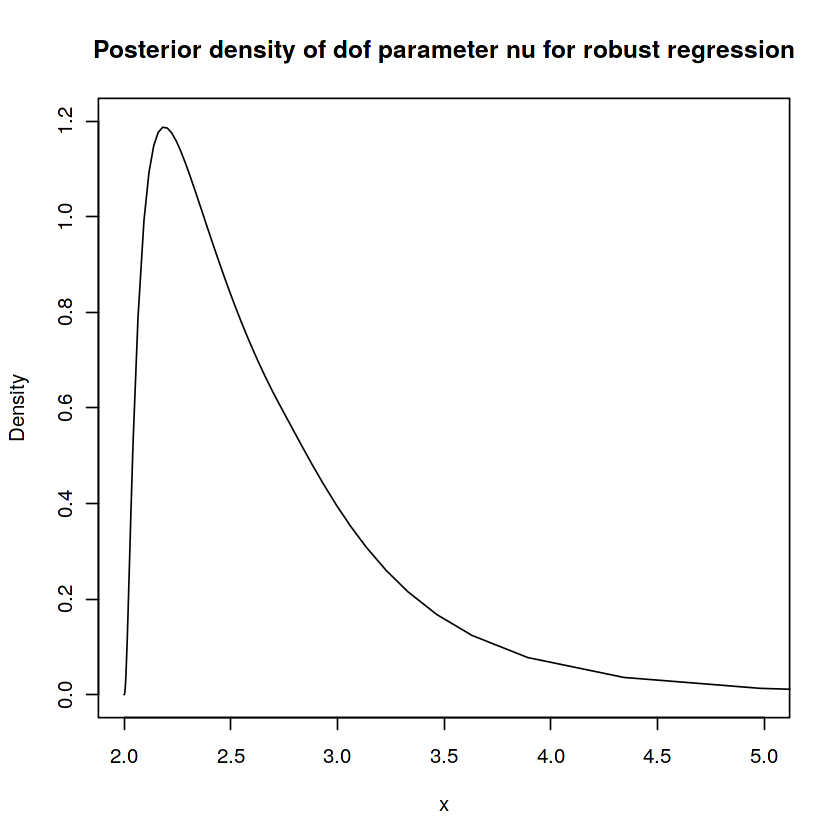

In [23]:
#You can find out that this marginal is called `degrees of freedom for student-t`
#by the summary above, or from 
names(m5I$marginals.hyper)
plot(m5I$marginals.hyper$`degrees of freedom for student-t`, type ="l",xlab="x",ylab="Density",xlim=c(2,5),ylim=c(0,1.2),
main='Posterior density of dof parameter nu for robust regression')

As you can see, INLA always assumes that $\nu>2$.

**(viii) Compare the linear regression model from part (ii) with the robust linear regression models from parts (vi) and (vii) in terms of marginal likelihood, Negative Sum Log CPO values, and DIC critera. Which one seems to be the best fit on the data according to these criteria?**

First, we refit the models by including control.compute=list(cpo=TRUE, dic=TRUE) to compute CPO and DIC

In [24]:
meanY <- mean(Year)
Year.ctr=Year-meanY
data=data.frame(Jump,Year.ctr)

prec.prior <- list(prec=list(prior = "loggamma", param = c(0.1, 0.1)))
prior.beta <- list(mean.intercept = 0, prec.intercept = 0.001,
                    mean = 0, prec = 0.001)
m1I <- inla(Jump ~Year.ctr,data=data,
            control.family=list(hyper=prec.prior),control.fixed=prior.beta,control.compute=list(cpo=TRUE, dic=TRUE))

prior.t <- list(prec=list(prior = "loggamma", param = c(0.1, 0.1)), dof = list(initial=3, fixed=TRUE) ) 
prior.beta <- list(mean.intercept = 0, prec.intercept = 0.001,
                    mean = 0, prec = 0.001)

m4I <- inla(Jump ~ Year.ctr,family="T",data=data,control.family=list(hyper=prior.t),control.fixed=prior.beta,
           control.compute=list(cpo=TRUE, dic=TRUE))

prior.t <- list(prec=list(prior = "loggamma", param = c(0.1, 0.1)), dof = list(prior = "loggamma",param = c(1, 1)) ) 
prior.beta <- list(mean.intercept = 0, prec.intercept = 0.001,
                    mean = 0, prec = 0.001)

m5I <- inla(Jump ~ Year.ctr,family="T",data=data.frame(Jump,Year.ctr),control.family=list(hyper=prior.t),control.fixed=prior.beta,
           control.compute=list(cpo=TRUE, dic=TRUE))


Now we are ready to print out the criteria.

In [25]:
cat("Log marginal likelihood of model 1:",m1I$mlik[1],"\n")
cat("Log marginal likelihood of model 2:",m4I$mlik[1],"\n")
cat("Log marginal likelihood of model 3:",m5I$mlik[1],"\n")

cat("DIC of model 1:",m1I$dic$dic,"\n")
cat("DIC of model 2:",m4I$dic$dic,"\n")
cat("DIC of model 3:",m5I$dic$dic,"\n")

cat("NSLCPO of model 1:",-sum(log(m1I$cpo$cpo)),"\n")
cat("NSLCPO of model 2:",-sum(log(m4I$cpo$cpo)),"\n")
cat("NSLCPO of model 3:",-sum(log(m5I$cpo$cpo)),"\n")

Log marginal likelihood of model 1: -19.29211 
Log marginal likelihood of model 2: -18.94634 
Log marginal likelihood of model 3: -17.41811 
DIC of model 1: 3.863351 
DIC of model 2: 2.960875 
DIC of model 3: 1.706626 
NSLCPO of model 1: 2.049733 
NSLCPO of model 2: 1.437735 
NSLCPO of model 3: 0.5847072 


According to all 3 criteria, the third model (robust regression with a Gamma prior on the degrees of freedom parameter $\nu$) fits best on the data.

# 2.  Multiple Linear Regression
# Factors Affecting Extinction Times of 62 Land Bird Species, adapted from Albert, 2009

**The data are taken from Ramsey and Schafer (1997), who took them
from Pimm et al. 1988, and are available in the `LearnBayes` package
as the object `birdextinct`. Land birds on 16 small islands had been
observed annually during breeding surveys over a period of several
decades. Some 62 species went extinct at some point and the
objective is to examine the relationship between the years till
extinction and three different covariates: the initial average
number of nesting pairs observed (`nesting`), the physical size of
the birds (an indicator variable `size` with 1=small and 0=large),
and migratory status (an indicator variable `status` with
1=resident, 0=migratory).**

**To begin, do the following in `R`.**



In [26]:
library(LearnBayes)
data(birdextinct)
n   <- nrow(birdextinct)
extinct.time <- birdextinct$time
avg.no.nests <- birdextinct$nesting
size  <- birdextinct$size   # 0 = large, 1= small
migratory   <- birdextinct$status # 0 = mig, 1=resident

log.extinct <- log(extinct.time)

# log.extinct=c(NA,log.extinct)
# n <- n+1
# extinct.time<- c(extinct.time[1],extinct.time)
# avg.no.nests<- c(avg.no.nests[1],avg.no.nests)
# size <- c(size[1],size)
# migratory <- c(migratory[1],migratory)

We have done some exploratory data analysis as well as Bayesian data analysis for this dataset in Workshop 2, Problem 3.
In this exercise, we will redo some of this using INLA.
As a first step, we center `avg.no.nests` variable, and the fit a classical multiple linear regression of the `log.extinct` on the three covariates.

In [27]:
nest.ctr <- avg.no.nests-mean(avg.no.nests)
extinct.ctr.mlr <- lm(log.extinct~ nest.ctr+size+migratory)
summary(extinct.ctr.mlr)


Call:
lm(formula = log.extinct ~ nest.ctr + size + migratory)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8410 -0.2932 -0.0709  0.2165  2.5167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.33636    0.17919   7.458 4.99e-10 ***
nest.ctr     0.26501    0.03679   7.203 1.33e-09 ***
size        -0.65220    0.16667  -3.913 0.000242 ***
migratory    0.50417    0.18263   2.761 0.007712 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6524 on 58 degrees of freedom
Multiple R-squared:  0.5982,	Adjusted R-squared:  0.5775 
F-statistic: 28.79 on 3 and 58 DF,  p-value: 1.577e-11


**(i) Use INLA to fit a Bayesian multiple linear regression analysis. Use the same priors that you have used for the JAGS model in question 4.3 of Workshop 2.**



In [28]:
migratory.prec.prior <- list(prec=list(prior = "loggamma", param = c(0.01, 0.01)))

migratory.prior.beta <- list(mean.intercept = 0, prec.intercept = 1e-5,
                    mean = 0, prec = 1e-5)

data=data.frame(log.extinct,nest.ctr,size,migratory)

extinct.m1I <- inla(log.extinct~ nest.ctr+size+migratory,family="gaussian",data=data,control.family=list(hyper=migratory.prec.prior),control.fixed=migratory.prior.beta)

**(ii) Print out the summary of the INLA model, and plot the posterior marginals of the regression parameters.**



In [29]:
summary(extinct.m1I)


Call:
   c("inla(formula = log.extinct ~ nest.ctr + size + migratory, family = 
   \"gaussian\", ", " data = data, control.family = list(hyper = 
   migratory.prec.prior), ", " control.fixed = migratory.prior.beta)") 
Time used:
    Pre = 0.325, Running = 0.0698, Post = 0.029, Total = 0.424 
Fixed effects:
              mean    sd 0.025quant 0.5quant 0.975quant   mode kld
(Intercept)  1.336 0.182      0.977    1.336      1.695  1.336   0
nest.ctr     0.265 0.037      0.191    0.265      0.339  0.265   0
size        -0.652 0.169     -0.986   -0.652     -0.319 -0.652   0
migratory    0.504 0.186      0.138    0.504      0.870  0.504   0

Model hyperparameters:
                                        mean    sd 0.025quant 0.5quant
Precision for the Gaussian observations 2.35 0.436       1.57     2.32
                                        0.975quant mode
Precision for the Gaussian observations       3.28 2.27

Expected number of effective parameters(stdev): 4.00(0.00)
Number of equivale

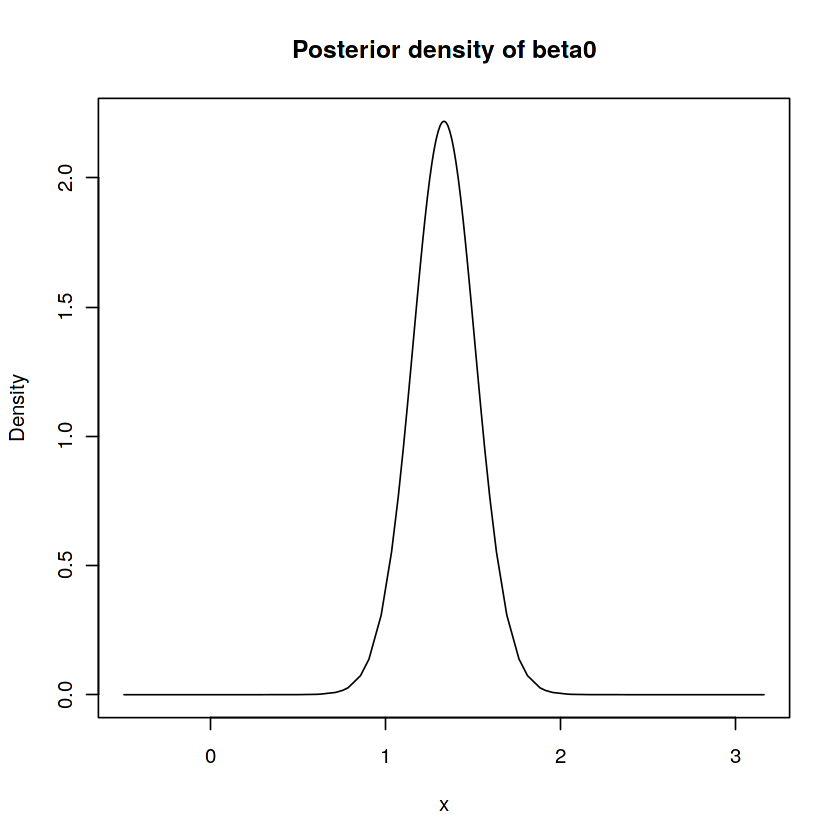

In [30]:
plot(extinct.m1I$marginals.fixed$`(Intercept)`, type ="l",xlab="x",ylab="Density",
main='Posterior density of beta0')

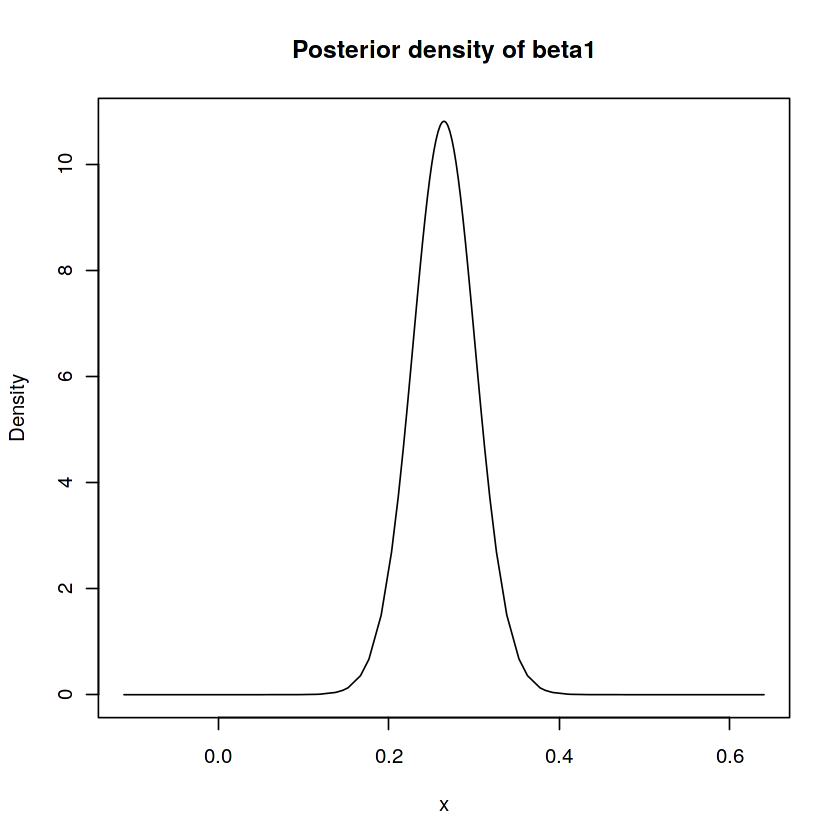

In [31]:
plot(extinct.m1I$marginals.fixed$nest.ctr, type ="l",xlab="x",ylab="Density",
main='Posterior density of beta1')

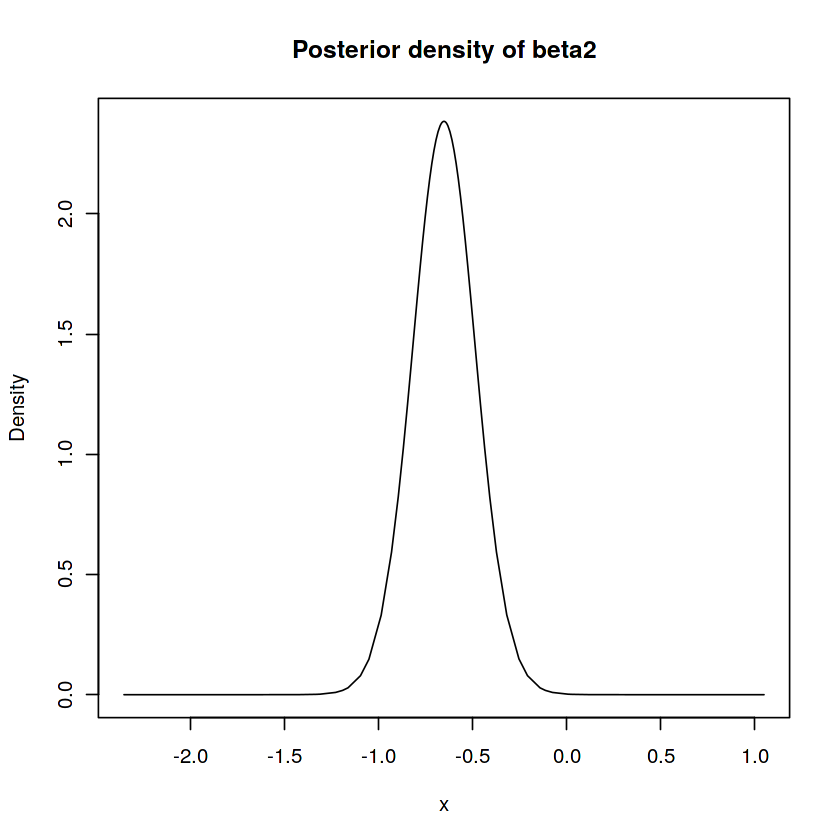

In [32]:
plot(extinct.m1I$marginals.fixed$size, type ="l",xlab="x",ylab="Density",
main='Posterior density of beta2')

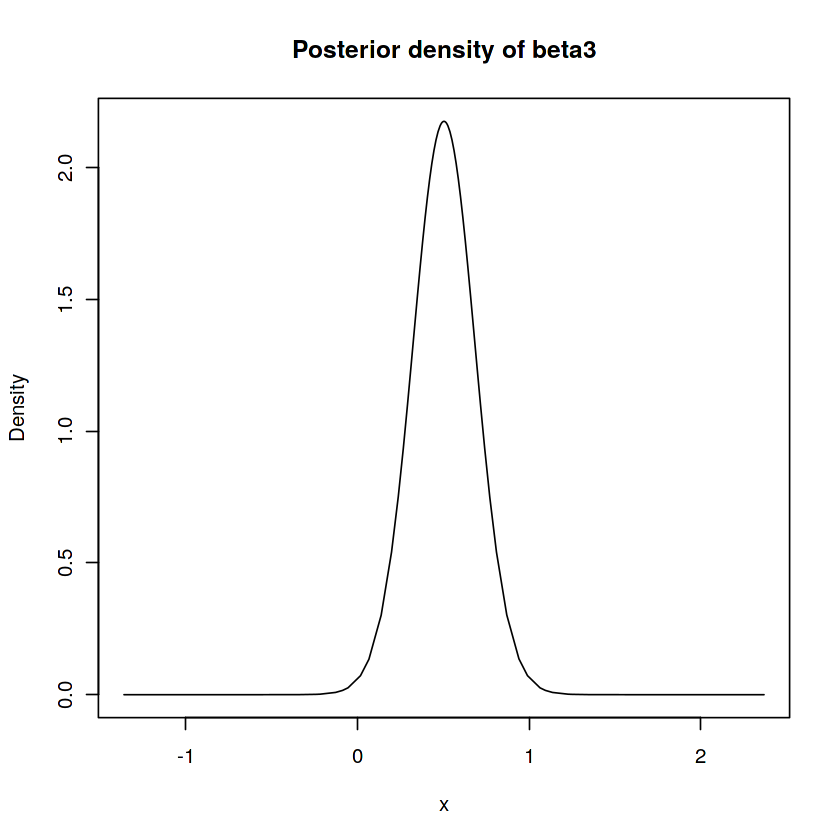

In [33]:
plot(extinct.m1I$marginals.fixed$migratory, type ="l",xlab="x",ylab="Density",
main='Posterior density of beta3')

In [34]:
extinct.marg.sigma <- inla.tmarginal(function(tau) tau^(-1/2),
  extinct.m1I$marginals.hyperpar$`Precision for the Gaussian observations`)
#Summary statistics of sigma
cat("Summary statistics of sigma for extinct dataset")
inla.zmarginal(extinct.marg.sigma)

Summary statistics of sigma for extinct datasetMean            0.661083 
Stdev           0.0621553 
Quantile  0.025 0.552715 
Quantile  0.25  0.61704 
Quantile  0.5   0.656225 
Quantile  0.75  0.69973 
Quantile  0.975 0.796571 


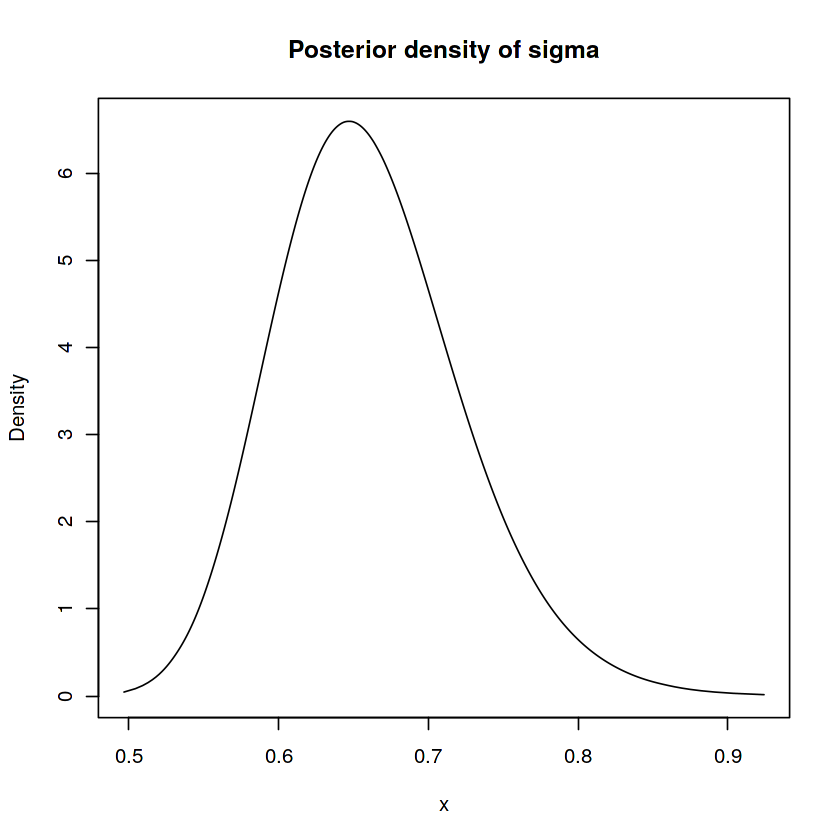

In [35]:
#Plot of marginal of sigma
plot(extinct.marg.sigma, type ="l",xlab="x",ylab="Density",
main='Posterior density of sigma')

**(iii) Calculate studentised residuals, draw a QQ-plot to check
normality, plot posterior mean fitted values, and carry out
posterior predictive checks for the minimum and maximum
log.extinct times. (See the ``R`` code for Lecture 2 on the Learn site
for example code to do this given some samples from the posterior.)**

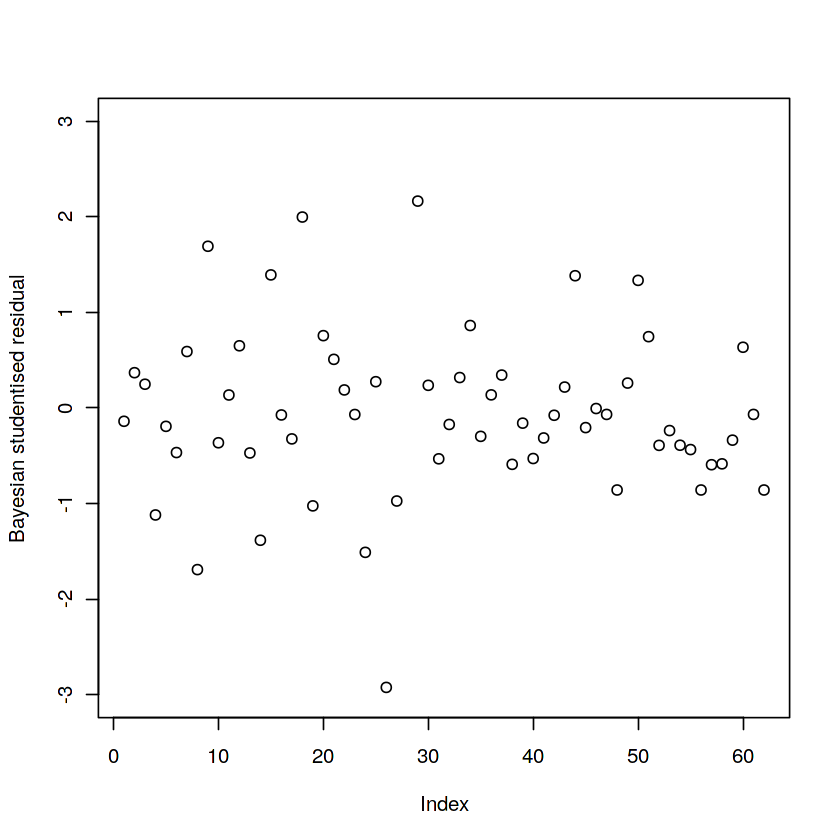

In [36]:
#Posterior predictive checks. 
#First,we rerun the model and obtain samples from the posterior
extinct.m1I <- inla(log.extinct~ nest.ctr+size+migratory,data=data,control.family=list(hyper=migratory.prec.prior),
                    control.fixed=migratory.prior.beta, control.predictor = list(compute = TRUE),control.compute = list(config = TRUE))
nbsamp=10000
extinct.samp <- inla.posterior.sample(nbsamp, extinct.m1I)

# #print(extinct.samp[[1]])
# beta0=rep(0,nbsamp);beta1=rep(1,nbsamp);beta2=rep(0,nbsamp);beta3=rep(0,nbsamp);
# sigma=rep(0,nbsamp);


beta0=inla.posterior.sample.eval(function(...) {(Intercept)},
  extinct.samp)
beta1=inla.posterior.sample.eval(function(...) {nest.ctr},
  extinct.samp)
beta2=inla.posterior.sample.eval(function(...) {size},
  extinct.samp)
beta3=inla.posterior.sample.eval(function(...) {migratory},
  extinct.samp)

sigma=1/sqrt(inla.posterior.sample.eval(function(...) {theta},
  extinct.samp))

#In this model the link function is the identity, so fitted values are the same as the linear predictors 
#(E(y_i|x,theta)=mu_i=eta_i)

fittedvalues=inla.posterior.sample.eval(function(...) {Predictor},
extinct.samp)

n=nrow(data)
x=cbind(rep(1,n),nest.ctr,size,migratory)
H=x%*%solve((t(x)%*%x))%*%t(x)

#studentised residuals
#n is the number of rows in the dataset, i.e. the number of observations
#studentised residuals
studentisedred=matrix(0,nrow=n,ncol=nbsamp)

#create a matrix of size n * nbsamp, repeating y in each column
y=data$log.extinct
ymx=as.matrix(y)%*%matrix(1,nrow=1,ncol=nbsamp);

studentisedred=ymx-fittedvalues;

for(l in 1:nbsamp){
  studentisedred[,l]=studentisedred[,l]/sigma[l];
}

for(i in 1:n){
  studentisedred[i,]=studentisedred[i,]/sqrt(1-H[i,i]);
}


#posterior mean of studentised residuals
studentisedredm=numeric(n)
for(i in 1:n){
  studentisedredm[i]=mean(studentisedred[i,])  
}



#Plot of posterior mean studentised residual versus observation number.
par(mfrow=c(1,1))
plot(seq_along(studentisedredm),studentisedredm,xlab="Index",ylab="Bayesian studentised residual",ylim=c(-3,3))


In the figure below we show a q-q plot based on the posterior mean studentised
residuals. These lie reasonably well on the diagonal line.

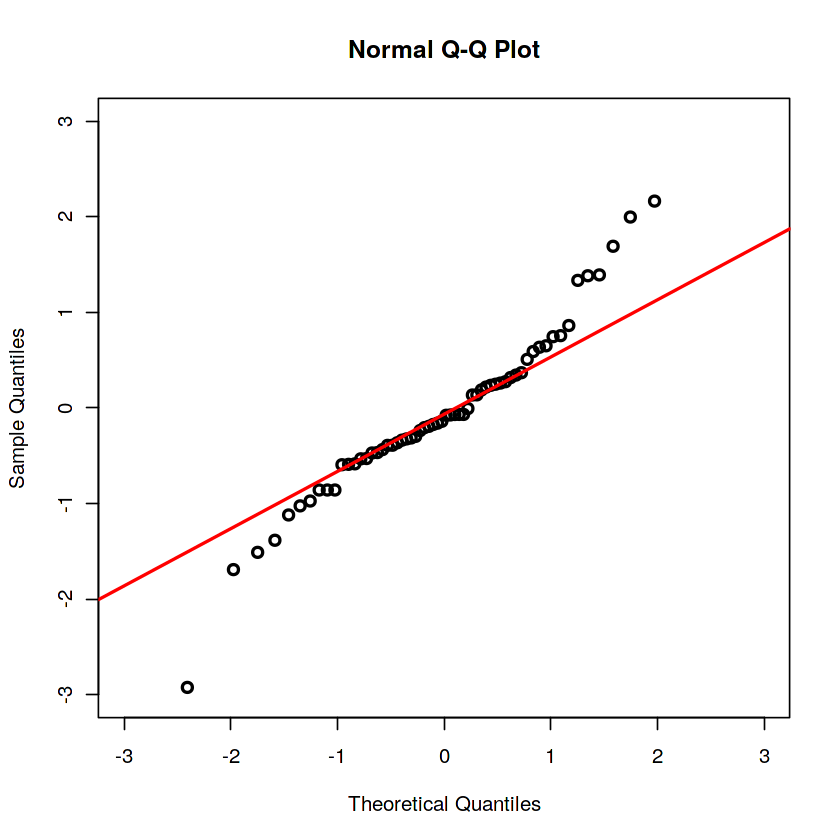

In [37]:
#QQ-plot
qqnorm(studentisedredm,xlim=c(-3,3),ylim=c(-3,3),lwd=2)
qqline(studentisedredm,col=2,lwd=2)

In the figure below we plot the studentised residual versus the posterior mean of the fitted value of the model. In this figure we are looking for any trends in the data which might suggest heteroscedastic errors or missing terms in the model for the mean. There are no obvious trends.

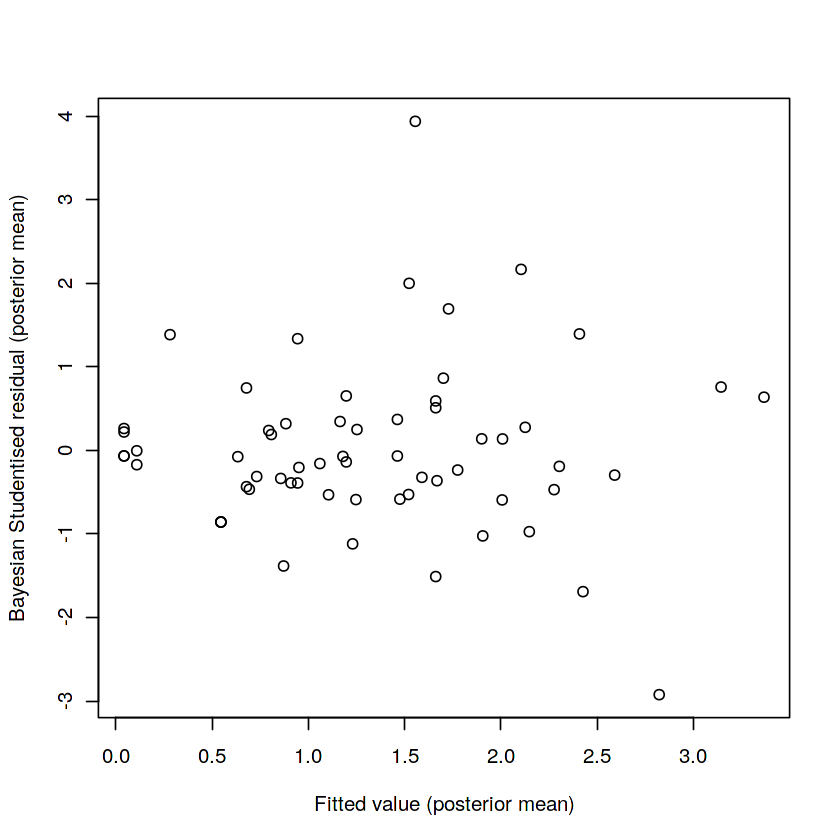

In [38]:
#Compute posterior mean fitted values
fittedvaluesm=numeric(n)
for(i in 1:n){
fittedvaluesm[i]=mean(fittedvalues[i,])
}

plot(fittedvaluesm,studentisedredm,xlab="Fitted value (posterior mean)",ylab="Bayesian Studentised residual (posterior mean)")

Finally, we do some posterior predictive checks.

Loading required package: fBasics

Loading required package: timeDate

Loading required package: timeSeries



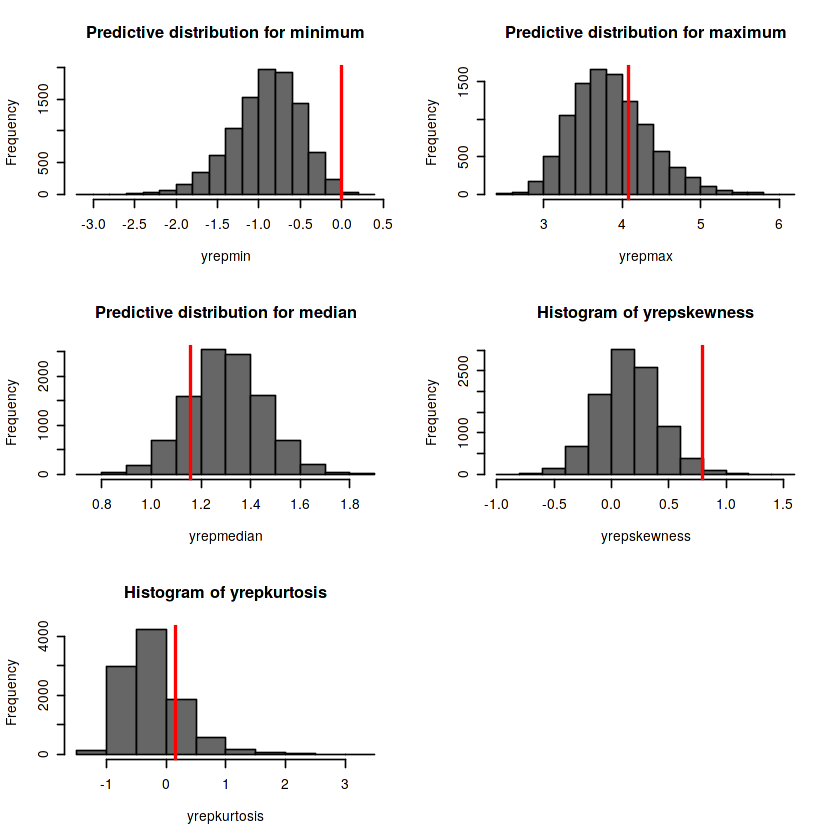

In [39]:
#Now do some predictive checks
#First replicate the data
yrep=matrix(0,nrow=n,ncol=nbsamp)
# for(l in 1:nbsamp){
#   for(i in 1:n){
#     yrep[i,l]=rnorm(1,beta0[l]*x[i,1]+beta1[l]*x[i,2]+beta2[l]*x[i,3]+beta3[l]*x[i,4],sigma[l])
#   }
# }

yrep=matrix(0,nrow=n,ncol=nbsamp)

for(row.num in 1:n){
    yrep[row.num, ]<-
    fittedvalues[row.num, ]+rnorm(n=nbsamp,mean=0,sd=sigma)
}

#Compute posterior preditive distribution of min amd max log(extinction time).
yrepmin=apply(yrep,2,min)
yrepmax=apply(yrep,2,max)
yrepmedian=apply(yrep,2,median)
require(fBasics)
yrepskewness=apply(yrep,2,skewness)
yrepkurtosis=apply(yrep,2,kurtosis)

par(mfrow=c(3,2))
hist(yrepmin,col="gray40",main="Predictive distribution for minimum")
abline(v=min(log.extinct),col="red",lwd=2)
hist(yrepmax,col="gray40",main="Predictive distribution for maximum")
abline(v=max(log.extinct),col="red",lwd=2)
hist(yrepmedian,col="gray40",main="Predictive distribution for median")
abline(v=median(y),col="red",lwd=2)
hist(yrepskewness,col="gray40")
abline(v=skewness(y),col="red",lwd=2,main="Predictive distribution for skewness")
hist(yrepkurtosis,col="gray40")
abline(v=kurtosis(y),col="red",lwd=2,main="Predictive distribution for kurtosis")

The histograms above show posterior predictive distribution for the minimum (top) and maximum (bottom) log extinction time for the Bayesian fit to the bird extinction time
data. The values int he observed data set are shown by vertical red lines.

Finally, the figures below show the posterior predictive distribution of minimum, maximum, median of the extinction time, as well as its skewness and kurtosis. These are estimated by taking a sequence of random draws from the posterior distribution, generating a new data set with observations at the same set of covariate values as the original data set based on the model for the mean specified by that draw from the posterior and then computing the relevant statistic from the mock data set. The histograms show the distribution of the derived statistic over those random realisations. The observed value of the same statistic, i.e. computed from the observed data set, is shown in both panels as a vertical red line. If the model is a good description of the data we expect the statistic value for the observed data set to lie within the histogram of values, i.e., it should not be a significant outlier. The distribution of the maximum extinction time looks OK in that regard, but this is not the case for the minimum extinction time. Looking more closely at the data set we see that there are no extinction times recorded that are less than 1 unit of time, but the linear model to log-extinction will predict values that range between 0 and ∞. This suggests that the linear model is not a good description for small extinction times, so modified versions of the model should be explored.

# 3. Predicting soccer scores by Poisson regression
# Adapted from "Modeling outcomes of soccer matches" by Tsokos et al.

In this question, we are going to use a simple Poisson regression model for modelling soccer scores.
We will be working with the Premier League 2019-2020 scores, that are available at https://www.football-data.co.uk/englandm.php.
<br><br>
Suppose that there are $G$ games in total, ordered in time.

We model the number of goals for the home team and the away team at the end of game $g$ by two independent Poisson random variables,
$$S_g^{H}\sim \text{Poisson}(\lambda_{g}^{H}), \quad S_g^{A}\sim \text{Poisson}(\lambda_{g}^{A}), \text{ where}$$
* $S_g^{H}$ denotes the number of goals of the home team at game $g$, and
* $S_g^{A}$ denotes the number of goals of the away team at game $g$.

These are assumed to be Poisson distributed with rates $\lambda_{g}^{H}$ and $\lambda_{g}^{A}$.

These rates are related to the linear predictors by the $\log$ link function, i.e. $\eta_{g}^{H}=\log(\lambda_{g}^{H})$ and
$\eta_{g}^{A}=\log(\lambda_{g}^{A})$.

The linear predictors themselves are going to be modeled as a combination of three terms: attacking strength, defending ability, and whether the team is playing at home, or away. For each team, we denote their attacking strength parameter by $a_{team}$, their defending strength parameter by $d_{team}$, and the effect of playing at home as $h$ (this effect is assumed to be the same for each team in the first instance, but you could also try to make it team specific $h_{team}$). This quantifies the effect of playing at home on the linear predictor of the number of goals, expected to be positive.

Our model for the linear predictors ($\eta_g^{H}$ is for the goals scored by the home team, and is $\eta_g^{A}$ is for the away team) is the following:

\begin{align}
\eta_{g}^{H}&= \beta_0+a_{home.team}+d_{away.team}+h\\
\eta_{g}^{A}&= \beta_0+a_{away.team}+d_{home.team}
\end{align}
Here $\beta_0$ is the intercept.
In order to avoid model identifiability issues (for example, if we increase $a$ by a certain amount for each team, and decrease $d$ by the same amount, nothing changes), the convention is to set the attacking and defending strength parameter $a_{team}$ and $d_{team}$ equal to 0 for one of the teams (so they are no longer part of the model). This is handled automatically by R if you use categorical variables for this.

Now we are going to load our dataset, implement this model in INLA, and then use our model for computing the posterior probability distribution of who will be the champion of the league after each round of games.

Note that this is a very basic model that could be significantly improved by including more covariates.

The code below loads the data.

In [40]:
#We load the Premier League scores dataset up to 2021 February 8
#system("wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=13-bszKXs0jyAvopee5ZnI6HGApHnkEdq' -O /kaggle/working/premier_league_2020_21.csv")
#full.data=read.csv("/kaggle/working/premier_league_2020_21.csv")
system("wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=1m6M5Nr6Q3x66rY-fOyGkxJK8EUy4-317' -O /kaggle/working/premier_league_2019_20.csv")
full.data=read.csv("/kaggle/working/premier_league_2019_20.csv")

head(full.data)

#The code below displays the info file about the dataset
#system("wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=1l_KjtmxpJpcNGMSBVpzmBxc9dpa2AZS_' -O /kaggle/working/football_data_notes.txt")
#fname <- '/kaggle/working/football_data_notes.txt'
#s=readChar(fname, file.info(fname)$size)
#cat(s)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,⋯,AvgC.2.5.1,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,⋯,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
2,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,⋯,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
3,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,⋯,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
4,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,⋯,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
5,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,⋯,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93
6,E0,10/08/2019,15:00,Watford,Brighton,0,3,A,0,1,⋯,1.73,-0.50,2.04,1.86,2.05,1.88,2.12,1.91,2.05,1.84


FTHG means full time home goals, and FTAG means full time away goals.

There are 20 teams in the Premier League (you can see the list below for the season 2019-2020).

Every team in the league plays twice against each other, so in total, there are 20\*19=380 games per season. 

The Premier League teams in 2019/20:

Arsenal
<br>
Aston Villa*
<br>
Bournemouth
<br>
Brighton & Hove Albion
<br>
Burnley
<br>
Chelsea
<br>
Crystal Palace
<br>
Everton
<br>
Leicester City
<br>
Liverpool
<br>
Manchester City
<br>
Manchester United
<br>
Newcastle United
<br>
Norwich City*
<br>
Sheffield United*
<br>
Southampton
<br>
Tottenham Hotspur
<br>
Watford
<br>
West Ham United
<br>
Wolverhampton Wanderers

\* are newly promoted teams

**a) Implement the Poisson regression model described above in INLA on this dataset, using the default priors.
<br>
Print out the summary statistics for the model, and discuss the results.
<br><br>
Hint: you need to store the number of goals scored by the home and away teams in a single response vector, y.
For example, you can let $y_1,\ldots,y_G$ correspond to the goals by the home teams in games $1,\ldots,G$, and
$y_{G+1},\ldots, y_{2G}$ correspond to the goals by the away teams in games $1,\ldots, G$.
<br>
The other covariates should also be adjusted accordingly. 
<br>
Using factors (i.e. categorical variables) is recommended. 
<br>
Combining two lists of factors is possible by turning them into strings using $\texttt{as.character}$, then combining them, and finally turning them back to factors by $\texttt{as.factor}$.
<br>
The outcome variables $y_{1},\ldots, y_{2G}$ contain the number of goals team A scores against another team B (A and B depends on index $i$ of $y_i$). 
<br>
The rate $\lambda_i$ for this variable $y_i$ in our Poisson model, and the corresponding linear predictor $\eta_i$,
are controlled by the attacking strength team $A$, the defending streng of team $B$, and whether team $A$ is the home team, or not.
This model can be described by three categorical variables $\texttt{attack}$, $\texttt{defense}$ and $\texttt{home}$, with INLA formula of the form
$$\texttt{y}\sim \texttt{attack+defense+home},$$
provided that we encode the names of the teams A, B and whether team A is the home team or not as 3 columns in a dataframe (as factors).**

In [41]:
y=c(full.data$FTHG, full.data$FTAG)
G=nrow(full.data)

HT_char=as.character(full.data$HomeTeam)
AT_char=as.character(full.data$AwayTeam)
attack=as.factor(c(HT_char,AT_char))
defense=as.factor(c(AT_char,HT_char))
playing.at.home=c(rep(1,G),rep(0,G))

data=data.frame(y,attack,defense,playing.at.home)
m.poisson=inla(formula=y~1+attack+defense+playing.at.home, data=data, family="Poisson")
summary(m.poisson)


Call:
   c("inla(formula = y ~ 1 + attack + defense + playing.at.home, family = 
   \"Poisson\", ", " data = data)") 
Time used:
    Pre = 1.16, Running = 0.17, Post = 0.0617, Total = 1.39 
Fixed effects:
                          mean    sd 0.025quant 0.5quant 0.975quant   mode kld
(Intercept)              0.185 0.202     -0.222    0.189      0.573  0.196   0
attackAston Villa       -0.293 0.206     -0.701   -0.292      0.108 -0.289   0
attackBournemouth       -0.320 0.207     -0.731   -0.318      0.083 -0.316   0
attackBrighton          -0.356 0.209     -0.771   -0.355      0.049 -0.352   0
attackBurnley           -0.263 0.203     -0.664   -0.261      0.133 -0.259   0
attackChelsea            0.216 0.180     -0.136    0.215      0.571  0.214   0
attackCrystal Palace    -0.591 0.224     -1.039   -0.588     -0.158 -0.582   0
attackEverton           -0.233 0.202     -0.632   -0.232      0.160 -0.231   0
attackLeicester          0.172 0.181     -0.182    0.172      0.530  0.171   0
atta

As we can see, Manchester City seems to have the strongest attack according to the posterior mean of the attack parameter,
while Liverpool seems to have the best defense.

**b) The games in the Premier League happen by rounds (typically lasting one week), where each team plays with another one.
There are 20 teams, so 10 games per round. 
<br>
Games 10(i-1) +1,..., 10 i in the dataset correspond to round i (there are some slight discrepancies in times, but we will ignore them here for simplicity).
<br>
At the end of each game, the winner gets 3 points, the loser gets 0, and if its a draw, both teams receive 1 points.
<br>
Using our Poisson regression model, compute the posterior probability of Liverpool winning the league (i.e. having the most points at the end of all games) at the end of each round for rounds 5, 10,15,20,25,30 and 35. Plot the result.
<br><br>
Hint: you can set the number of goals in the games played after row i as NA in the dataset, and then call INLA. The Predictor variables in the output of inla.posterior.sample contain samples of the linear predictors from the posterior, including those for the remaining games.
You are recommended to write a separate function computing the points (i.e. league table) from the scores of all games.**

First we write a function that computes the league table from the scores.

In [42]:
#This function computes the points (i.e. league table) from a list of the scores 
#(as a 2*G vector, first G elements home team goals for the G games, while (G+1):(2*G) elements are the away team goals)
#home.t and away.t are vectors of length G that describe the home and away teams for each game
compute.points <- function(scores,home.t,away.t){
    n.teams=20;
    G=380;
    points=rep(0,n.teams)
    
    home.team=as.integer(home.t)
    away.team=as.integer(away.t)
   
       
    home.win=(scores[1:G]>scores[(G+1):(2*G)])
    draw=(scores[1:G]==scores[(G+1):(2*G)])
    away.win=(scores[1:G]<scores[(G+1):(2*G)])
    
   
    
    for (g in 1:G){
        if(home.win[g]){
            points[home.team[g]]=points[home.team[g]]+3
        }
        if(away.win[g]){
            points[away.team[g]]=points[away.team[g]]+3
        }
        if(draw[g]){
            points[home.team[g]]=points[home.team[g]]+1            
            points[away.team[g]]=points[away.team[g]]+1
        }
    }
    return(points)
}


Now we compute the required probability based on the Hint in the question.

In [ ]:
prob.liverpool.champion=rep(0,7)
for (i in 1:7){
#r denotes the round which we are interested in among (5,10,15,20,25,30,35)

r=5*i
    

#We create a new dataframe where the matches after round r have NA in their response variables y 

data.r=data
data.r[(10*r+1):G,"y"]<-NA
data.r[(G+10*r+1):(2*G),"y"]<-NA   

    
#We fit the Poisson regression model in INLA for this new dataset, including the options needed for sampling
    
m.poisson.r=inla(formula=y~1+attack+defense+playing.at.home, data=data.r, family="Poisson",
                 control.predictor = list(compute = TRUE), control.compute = list(config = TRUE))

    

#We obtain the samples from the linear predictors
nbsamp=1000
samp.r <- inla.posterior.sample(nbsamp, m.poisson.r)
predictors.r=inla.posterior.sample.eval(function(...) {Predictor},
samp.r)
    


#We will store the scores.samples from the posterior predictive in a matrix scores.samples.r
#First, we fix the values of the scores for the games played up to round r from the original dataset
scores.samples.r=matrix(0,nrow=2*G,ncol=nbsamp)
scores.samples.r[1:(10*r),]=rep(data.r[1:(10*r),"y"],nbsamp)
scores.samples.r[(G+1):(G+10*r),]=rep(data.r[(G+1):(G+10*r),"y"],nbsamp);

#The next step is to sample from the posterior predictive for the scores of the games after round r
#This is done using the linear predictors, first we compute the rates of the Poisson variables (mean of the observations)
#by taking the exponential of the linear predictor
#After this, we sample the variables from the Poisson distribution with these rates
#This has to be done for the goals of the home team and the away team separately
#as we store them in different parts of the matrix, but the method is the same    
    
rates.H=exp(predictors.r[(10*r+1):G,])
vector.rates.H=as.vector(rates.H)
scores.samples.r[(10*r+1):G,]=as.matrix(rpois(length(vector.rates.H),vector.rates.H),nrow=(G-10*r),ncol=nbsamp)

rates.A=exp(predictors.r[(G+10*r+1):(2*G),])
vector.rates.A=as.vector(rates.A)
scores.samples.r[(G+10*r+1):(2*G),]=as.matrix(rpois(length(vector.rates.A),vector.rates.A),nrow=(G-10*r),ncol=nbsamp)

#Now that we have simulated the results for the remaining games from the posterior predictive, we can compute the probability
#of Liverpool being the champion
#At each iteration, we compute the league table (i.e. points for each team) using our compute.points function
#prob.liverpool.champion is computed by taking the average
    
liverpool.champion=rep(0,nbsamp)
for (it in 1:nbsamp){
    points=compute.points(scores.samples.r[,it],home.t=full.data$HomeTeam,away.t=full.data$AwayTeam)
    if(points[10]==max(points)){
        liverpool.champion[it]=1
    }
}
prob.liverpool.champion[i]=mean(liverpool.champion)
}
#F

plot(x=seq(from=5,to=35,by=5),y=prob.liverpool.champion,type="l",main='Posterior probability that Liverpool is champion vs round number',
     xlab="Round number",ylab="Posterior probability that Liverpool is the champion")